<a href="https://colab.research.google.com/github/nhphuc414/PopulationForecastMining/blob/main/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import thu vien
import pandas as pd
import numpy as np
# Doc du lieu
df_world_population = pd.read_csv("/content/world-population.csv")
df_world_forecast = pd.read_csv("/content/world-forecast.csv")
df_world_population
# Sua columns
df_world_population.columns = ['country', 'year', 'population', 'yearly_percent', 'yearly_change', 'migrants_net',
                           'median_age', 'fertility_rate', 'density_pkm', 'urban_pop_percent', 'urban_population',
                           'countrys_share_of_world_pop', 'world_population', 'rank']
df_world_forecast.columns = ['country', 'year', 'population', 'yearly_percent', 'yearly_change', 'migrants_net',
                           'median_age', 'fertility_rate', 'density_pkm', 'urban_pop_percent', 'urban_population',
                           'countrys_share_of_world_pop', 'world_population', 'rank']
df_world_population
# Xóa dấu phần trăm
def remove_percent_sign(df, columns):
    for col in columns:
        df[col] = df[col].str.replace('%', '')
columns_to_process = ['yearly_percent', 'urban_pop_percent', 'countrys_share_of_world_pop']
remove_percent_sign(df_world_population, columns_to_process)
remove_percent_sign(df_world_forecast, columns_to_process)
df_world_population
# Chuyển sang kiểu dữ liệu số
def convert_to_numeric(df, columns):
    for col in columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
numeric_columns = ['yearly_percent', 'urban_pop_percent', 'countrys_share_of_world_pop',
                  'urban_population', 'migrants_net']
convert_to_numeric(df_world_population, numeric_columns)
convert_to_numeric(df_world_forecast, numeric_columns)
df_world_population.dtypes
# Lấp dữ liệu NaN
import math
def fill_na_data(df, col_to_group, cols_to_fill):
    for col_to_fill in cols_to_fill:
        if col_to_fill == 'migrants_net' or col_to_fill == 'urban_population':
          df[col_to_fill] = df.groupby([col_to_group])[col_to_fill].\
          transform(lambda x: x.fillna(math.ceil(x.mean()) if not np.isnan(x.mean()) else x.mean()))
        else:
          df[col_to_fill] = df.groupby([col_to_group])[col_to_fill].\
          transform(lambda x: x.fillna(math.ceil(x.mean()) if not np.isnan(x.mean()) else x.mean()))
cols_to_fill = ['migrants_net','urban_pop_percent', 'urban_population', 'median_age', 'fertility_rate']
fill_na_data(df_world_population, 'country', cols_to_fill)
fill_na_data(df_world_population, 'year', cols_to_fill)
fill_na_data(df_world_forecast, 'country', cols_to_fill)
fill_na_data(df_world_forecast, 'year', cols_to_fill)
df_world_population.isna().sum()

country                        0
year                           0
population                     0
yearly_percent                 0
yearly_change                  0
migrants_net                   0
median_age                     0
fertility_rate                 0
density_pkm                    0
urban_pop_percent              0
urban_population               0
countrys_share_of_world_pop    0
world_population               0
rank                           0
dtype: int64

In [ ]:
less_than_zero = -0.15
zero_value = 0
greater_than_zero = 1.5
#Tạo nhãn
def label_assignment(dataframe):
  dummy_labels = ['More Decrease','Decrease', 'Increase', 'More Increase']
  dataframe['Type'] = ""
  dataframe.loc[dataframe['yearly_percent'] <= less_than_zero, 'Type'] = dummy_labels[0]
  dataframe.loc[(dataframe['yearly_percent'] > less_than_zero) & (dataframe['yearly_percent'] <= zero_value)
  , 'Type'] = dummy_labels[1]
  dataframe.loc[(dataframe['yearly_percent'] > zero_value) &  (dataframe['yearly_percent'] <= greater_than_zero)
  , 'Type'] = dummy_labels[2]
  dataframe.loc[dataframe['yearly_percent'] > greater_than_zero
  , 'Type' ] = dummy_labels[3]
  return dataframe['Type']
def processing_data(df):
  df['Type']=label_assignment(df)
  features = [ 'population','yearly_change', 'migrants_net','fertility_rate', 'density_pkm', 'urban_population',
              'countrys_share_of_world_pop','Type']
  return df[features]


df_world_population_mining = processing_data(df_world_population)
df_world_forecast_mining = processing_data(df_world_forecast)
x_train = df_world_population_mining.drop(columns=['Type'])
y_train = df_world_population_mining['Type']
x_test = df_world_forecast_mining.drop(columns=['Type'])
y_test = df_world_forecast_mining['Type']
df_world_forecast_mining

,population,yearly_change,migrants_net,fertility_rate,density_pkm,urban_population,countrys_share_of_world_pop,Type
0,38928346,902949,-62920.0,4.56,60,9904337.0,0.50,More Increase
1,43531519,920635,-60000.0,4.56,67,11704638.0,0.53,More Increase
2,48093578,912412,-66018.0,4.56,74,13817897.0,0.56,More Increase
3,52587408,898766,-62359.0,4.56,81,16279334.0,0.59,More Increase
4,56912009,864920,-62360.0,4.56,87,19103637.0,0.62,More Increase
...,...,...,...,...,...,...,...,...
1640,17596447,297193,-19999.0,3.63,45,7370279.0,0.21,More Increase
1641,19212087,323128,-10000.0,3.63,50,8580510.0,0.22,More Increase
1642,20863619,330306,-10000.0,3.63,54,10097359.0,0.23,More Increase
1643,22464718,320220,-10000.0,3.63,58,11802761.0,0.24,Increase


In [ ]:
from sklearn.tree import export_text, DecisionTreeClassifier, export_graphviz
from sklearn.metrics import confusion_matrix, classification_report,mean_squared_error,accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
import seaborn as sns
import graphviz
import matplotlib.pyplot as plt
df_world_population_mining = processing_data(df_world_population)
df_world_forecast_mining = processing_data(df_world_forecast)
x_train = df_world_population_mining.drop(columns=['Type'])
y_train = df_world_population_mining['Type']
x_test = df_world_forecast_mining.drop(columns=['Type'])
y_test = df_world_forecast_mining['Type']
# Tạo cây quyết định
param_grid = {
        'criterion': ['gini', 'entropy'],
        'splitter': ['best', 'random'],
        'max_depth': [None,10, 20,30,40],
        'min_samples_split': [2, 5, 10,15,20],
        'min_samples_leaf': [1, 2, 4,6,8,10]
}
model = DecisionTreeClassifier()
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)
best_clf = grid_search.best_estimator_

print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)



Best Parameters:
Best Accuracy: 0.9065798285941312


Tỷ lệ sai số : 13.07%


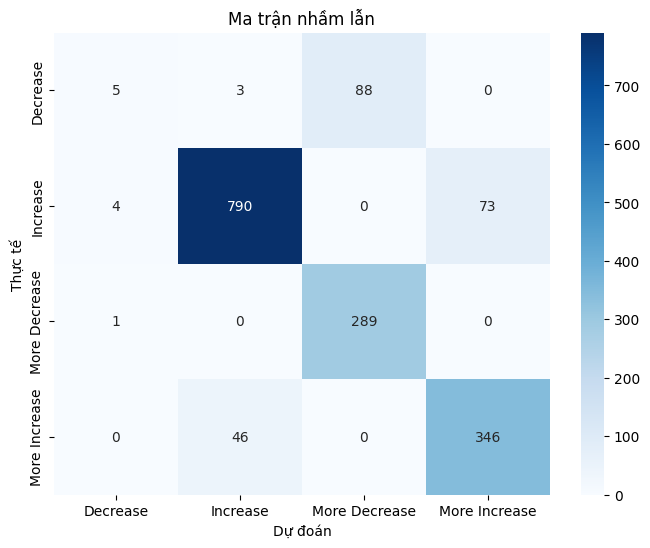

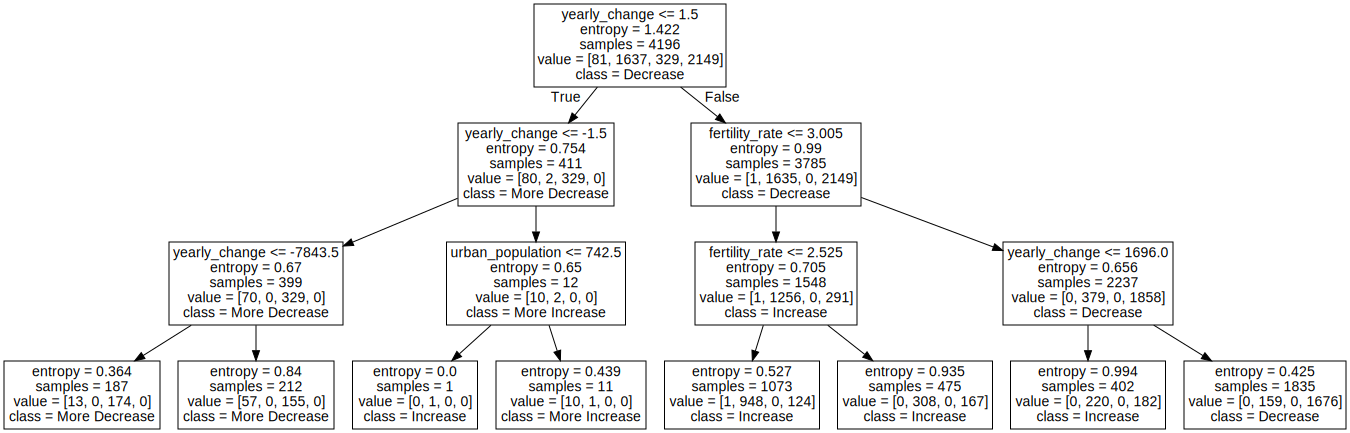

In [ ]:
# Tạo cây quyết định
model = DecisionTreeClassifier(criterion='entropy',
                               max_depth=3, min_samples_leaf=1,
                               min_samples_split=2, splitter='best')
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
# Sai số
test_error = 1 - accuracy_score(y_test, y_pred)
print(f'Tỷ lệ sai số : {round(test_error*100, 2)}%')
cm = confusion_matrix(y_test,y_pred)
classes = np.unique(np.concatenate((y_test, y_pred)))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.xlabel('Dự đoán')
plt.ylabel('Thực tế')
plt.title('Ma trận nhầm lẫn')
plt.show()
#Tạo tệp DOT từ cây quyết định
dot_data = export_graphviz(model, out_file=None,
feature_names=x_train.columns, class_names=y_train.unique())

# Vẽ cây quyết định bằng graphviz
graph = graphviz.Source(dot_data)
graph.render("decision_tree")
graph
